In [1]:
import sklearn
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

calhouse = sklearn.datasets.fetch_california_housing()
dfx = pd.DataFrame(calhouse.data, columns = calhouse.feature_names)
dfy = pd.DataFrame(calhouse.target, columns=['y'])
df = pd.concat([dfx, dfy],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


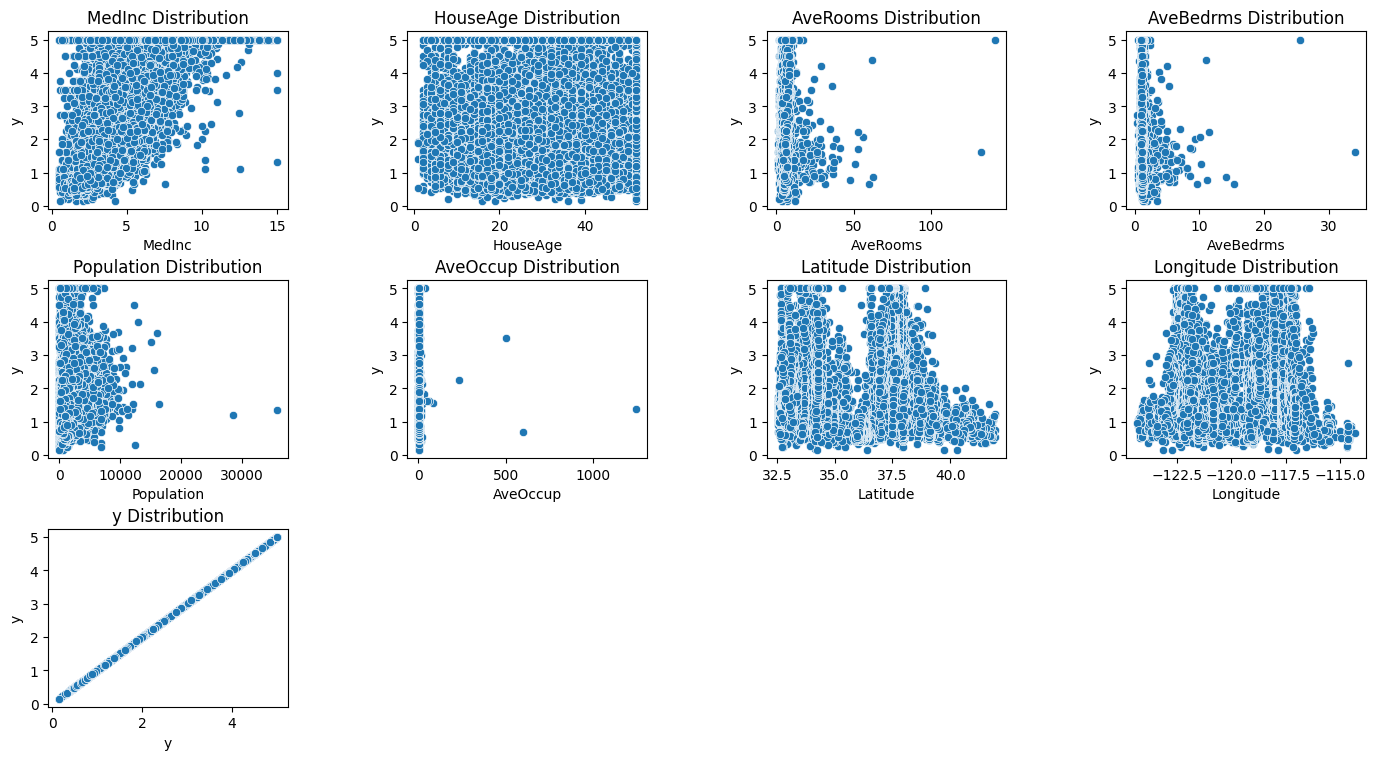

In [2]:
grid = gridspec.GridSpec(4,4)
plt.figure(figsize=(17,12))
plt.subplots_adjust(wspace= 0.5, hspace=0.4)

cal_feature =df.columns

for idx, feature in enumerate(cal_feature):
    ax = plt.subplot(grid[idx])
    sns.scatterplot(x = feature,
                   y='y',
                   data = df,
                   ax = ax)
    ax.set_title(f'{feature} Distribution')

In [3]:
model=sm.OLS.from_formula('y~MedInc+HouseAge+AveRooms',data=df)
model_res = model.fit()
model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7220.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:29:53   Log-Likelihood:                -24836.
No. Observations:               20640   AIC:                         4.968e+04
Df Residuals:                   20636   BIC:                         4.971e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0204      0.022      0.928      0.353      -0.023       0.063
MedInc         0.4428      0.003    141.292      0.000       0.437       0.449
HouseAge       0.0168      0.000     37.185      0.000       0.016       0.018
AveRooms      -0.0272      0.002    -11.231      0.000      -0.032      -0.022
==============================================================================
Omnibus:                     4387.129   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11558.910
Skew:                           1.150   Prob(JB):                         0.00
Kurtosis:                       5.855   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""